<a href="https://colab.research.google.com/github/vishal9849/AI-ML_projects/blob/master/Vishal_Sabarinath_C0801202_DV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# finiding the list of datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
# loading the flight dataset
flights_df = sns.load_dataset('flights')
print(flights_df.shape)
flights_df[:5]

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


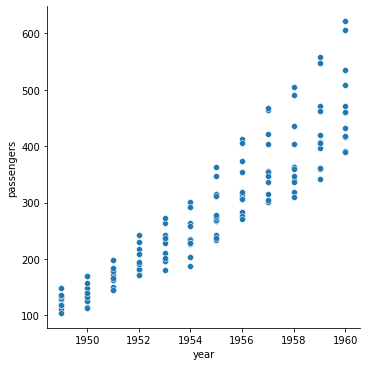

In [ ]:
# using relplot to find the relation between the column year and passengers
sns.relplot(data=flights_df,x='year',y='passengers');

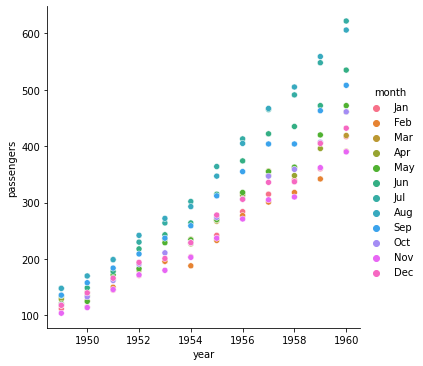

In [ ]:
# Using the hue property we can identify the passengers according to particular months
sns.relplot(data=flights_df,x='year',y='passengers',hue='month');

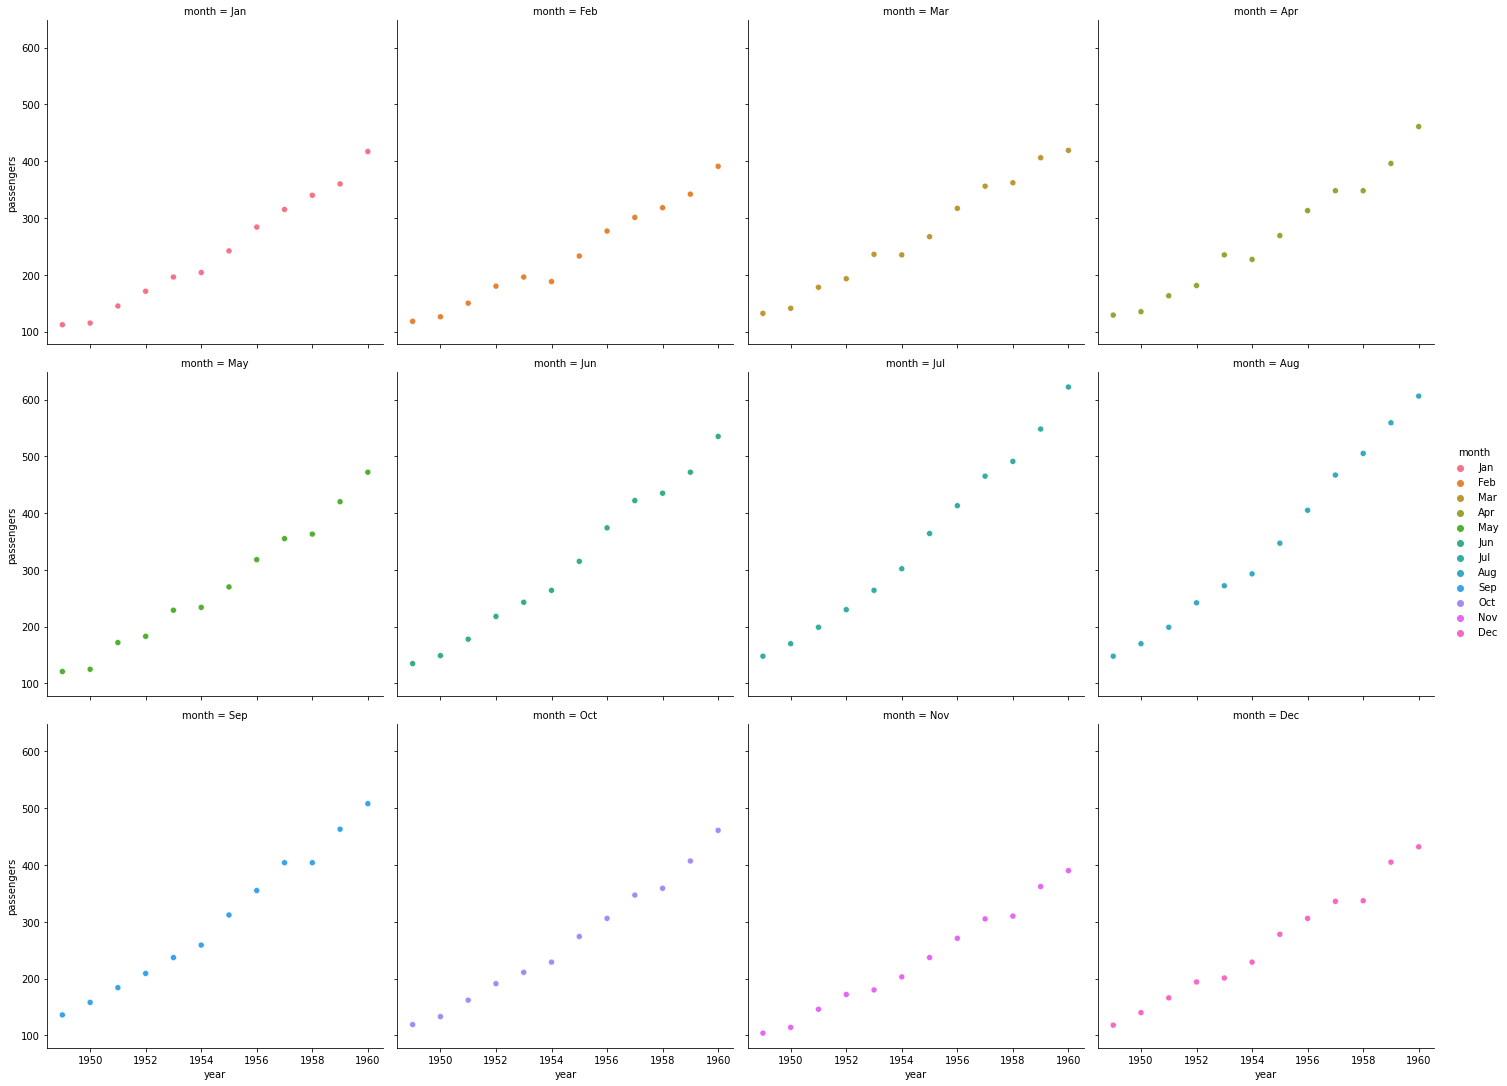

In [ ]:
# using col to seperate the plot with column values
# using col_wrap to show the output figure in required columns
sns.relplot(data=flights_df,x='year',y='passengers',col='month',col_wrap=4,hue='month');

In [ ]:
flights_df[flights_df['passengers'] == flights_df['passengers'].max()]

,year,month,passengers
138,1960,Jul,622


In [ ]:
flights = flights_df.pivot('year','month','passengers')
flights

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


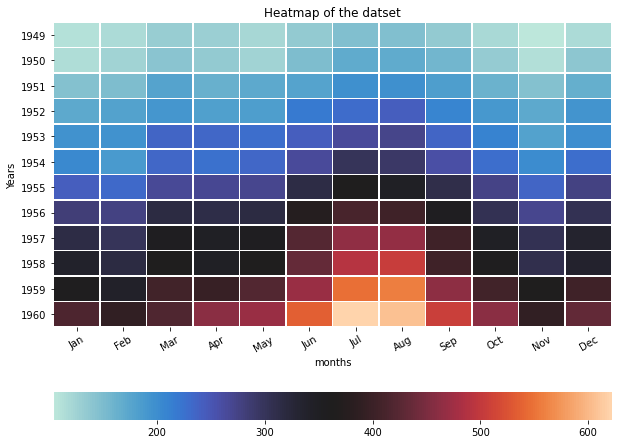

In [ ]:
# creating a seaborn heat map for the above table
# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig, axis = plt.subplots(figsize = (10,8))
axis = sns.heatmap(flights, cmap="icefire",linewidths=.6,cbar_kws={"orientation": "horizontal"})
axis.set(xlabel='months', ylabel='Years',title = "Heatmap of the datset")
axis.set_xticklabels(axis.get_xticklabels(), rotation=30)
axis.set_xlabel(axis.get_xlabel())
plt.show()

In [ ]:
# Analyzing tips data using seaborn relpot
tips = sns.load_dataset('tips')
print(tips.shape)
tips[:3]

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


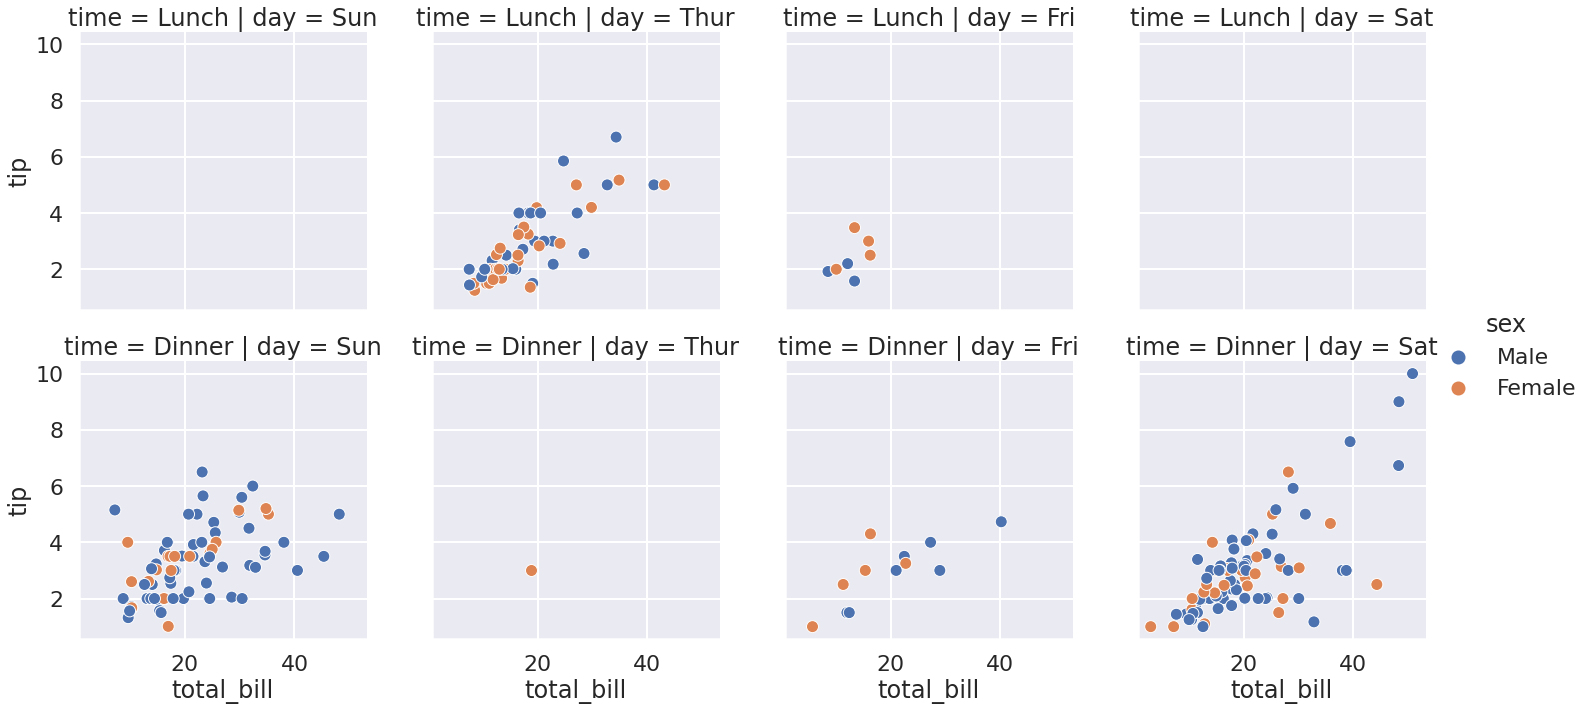

In [ ]:
# Reference : http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
sns.set_theme(context='poster')

# sns.set(rc={'figure.figsize':(12,9)})
figure = sns.relplot(data=tips,x='total_bill',y='tip',hue='sex',col='day', row='time', col_order=['Sun','Thur','Fri','Sat'])
# figure.fig.set_size_inches(5,5)


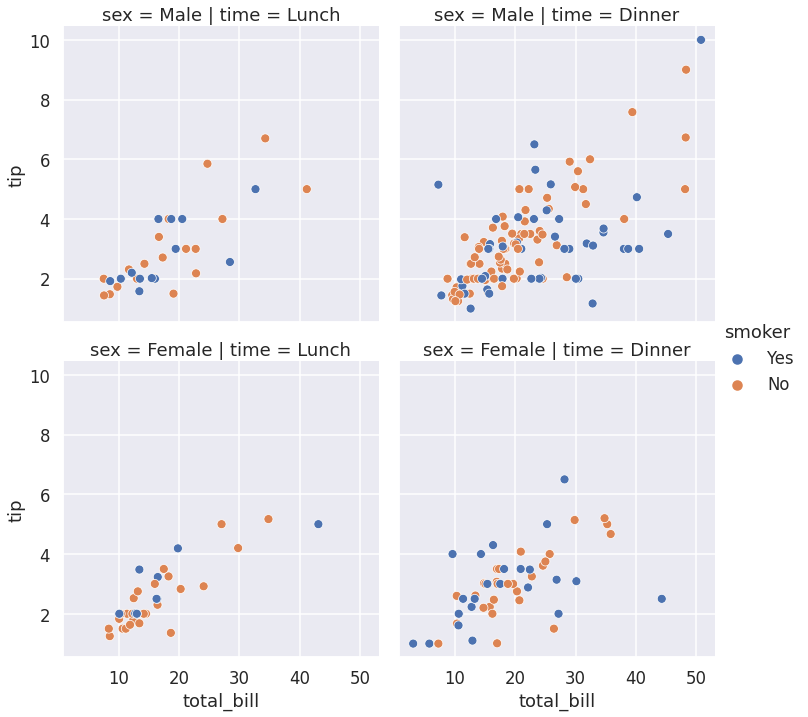

In [ ]:
# Plotting a graph to analyze smokers with time and money using seaborn
sns.set_theme(context="talk")
sns.relplot(data=tips,x='total_bill',y='tip',hue='smoker',col='time', row='sex')
plt.show()

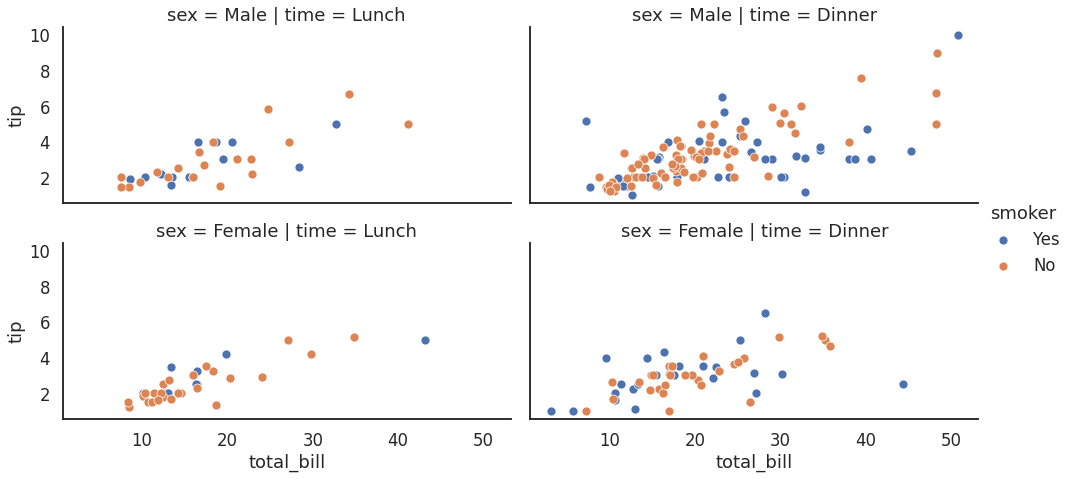

In [ ]:
# plotting the above plot with multi-lot with FacetGrid
# other styles inclue: whitegrid,darkgrid,ticks
sns.set_style('white')

g = sns.FacetGrid(tips, col='time', row = 'sex',hue = 'smoker',height=3.5,aspect=2)
g.map(sns.scatterplot, 'total_bill','tip')
g.add_legend();

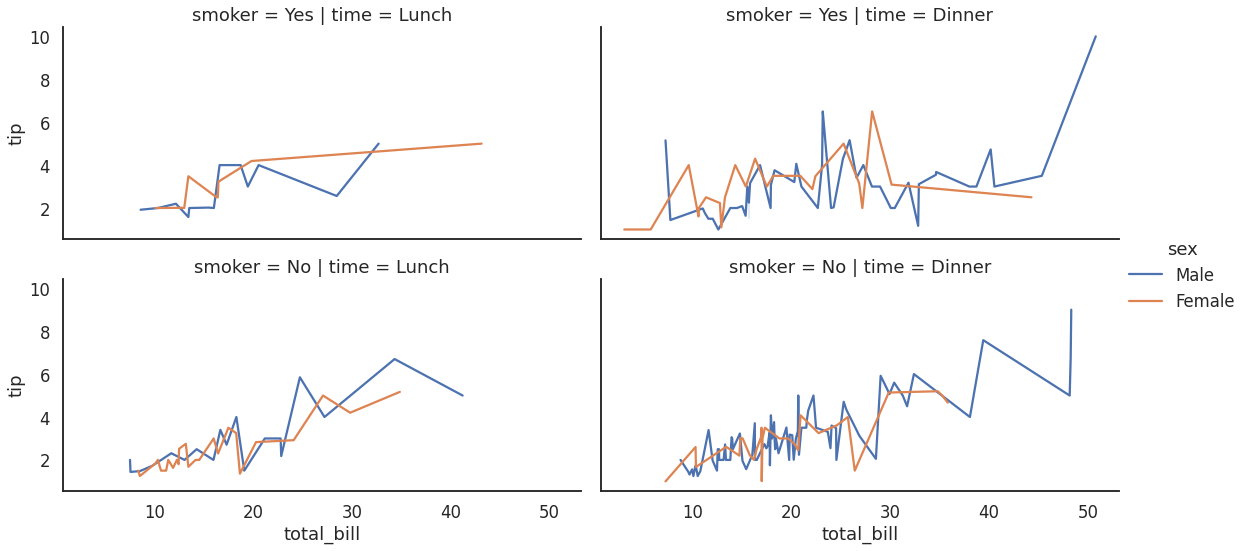

In [ ]:
# Reference: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(data = tips,row="smoker", col="time",height=4,aspect=2,hue='sex')
g.map(sns.lineplot,'total_bill','tip')
g.add_legend()
plt.show()

In [ ]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic[:3]

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


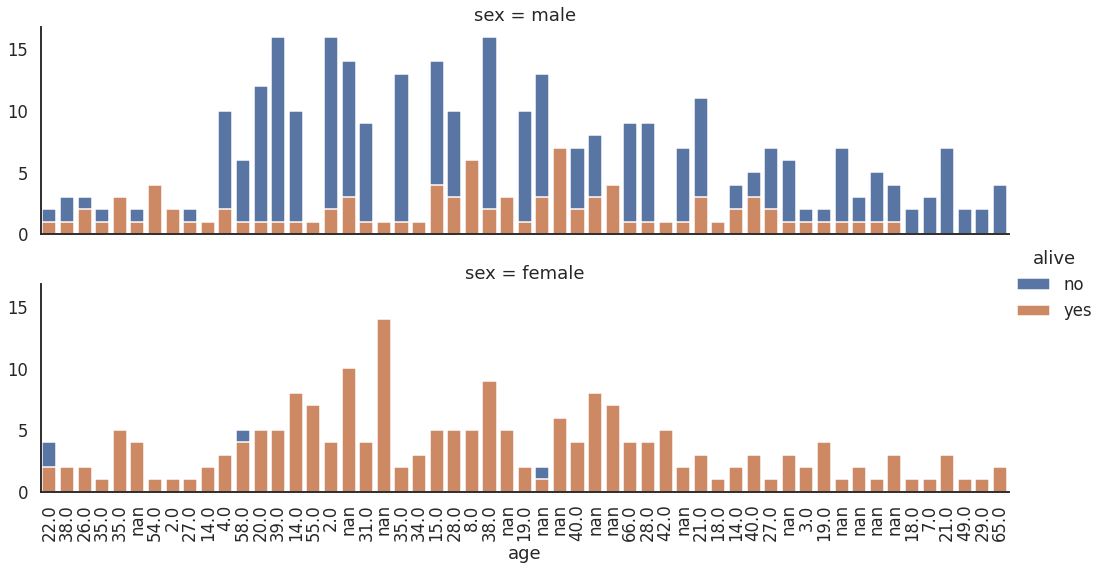

In [ ]:
g = sns.FacetGrid(data = titanic, col='sex',height=4, aspect=3.6, col_wrap=1, hue='alive')
g.map(sns.countplot,'age')
g.set_xticklabels(titanic['age'], rotation=90)
g.add_legend()
plt.show()

In [ ]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
titanic[ (titanic['sex'] == 'male') & (titanic['alive'] == 'no') ]['sex'].value_counts()
# from the grap above and the data we can see that many men did not survive compared to women

male    468
Name: sex, dtype: int64

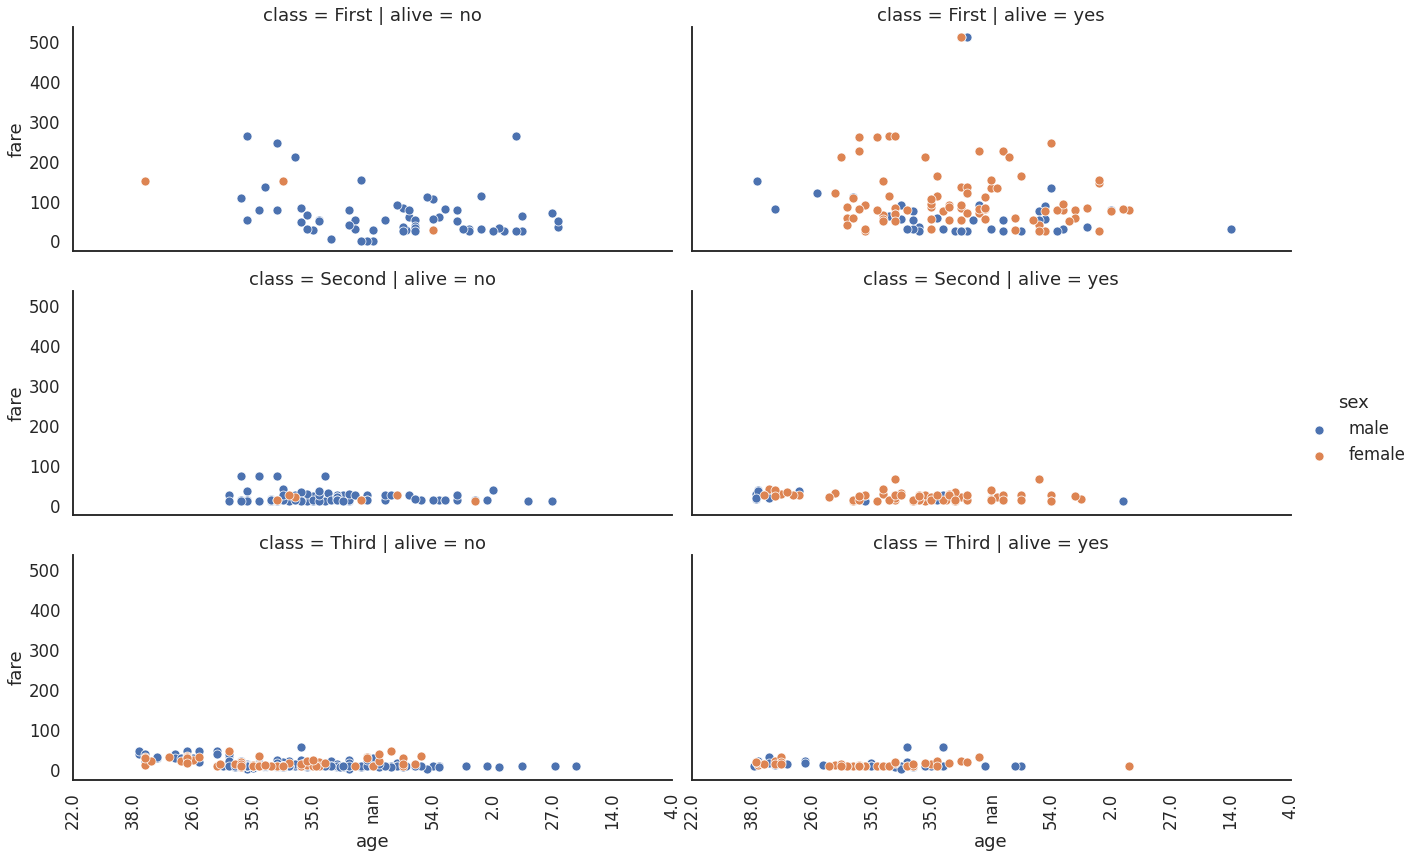

In [ ]:
g = sns.FacetGrid(data = titanic, col='alive',row='class',hue='sex',height=4,aspect=2.3)
g.map(sns.scatterplot,'age','fare')
g.set_xticklabels(titanic['age'], rotation=90)
g.add_legend()
plt.show()

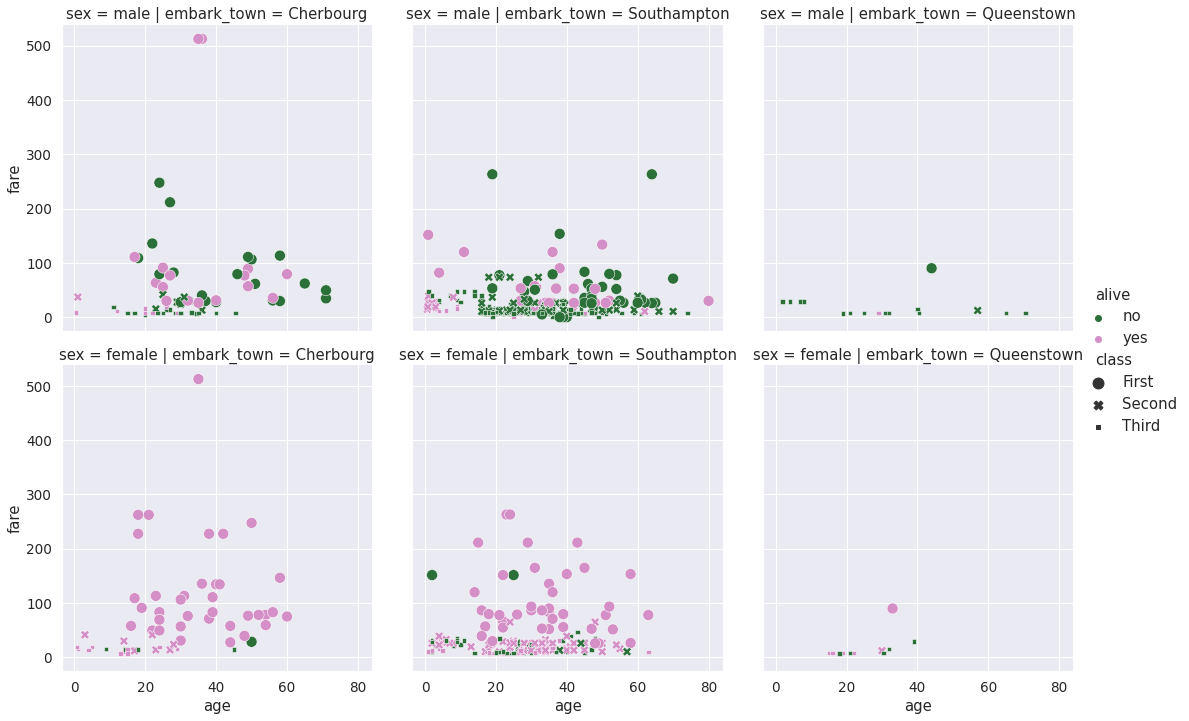

In [ ]:
# Reference: https://seaborn.pydata.org/generated/seaborn.relplot.html

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.24)
sns.relplot(data= titanic, x='age', y='fare',col='embark_town', size='class', row='sex',
            sizes=(40,120), hue='alive',col_order=['Cherbourg','Southampton','Queenstown'],
            palette='cubehelix', style='class')
plt.show()

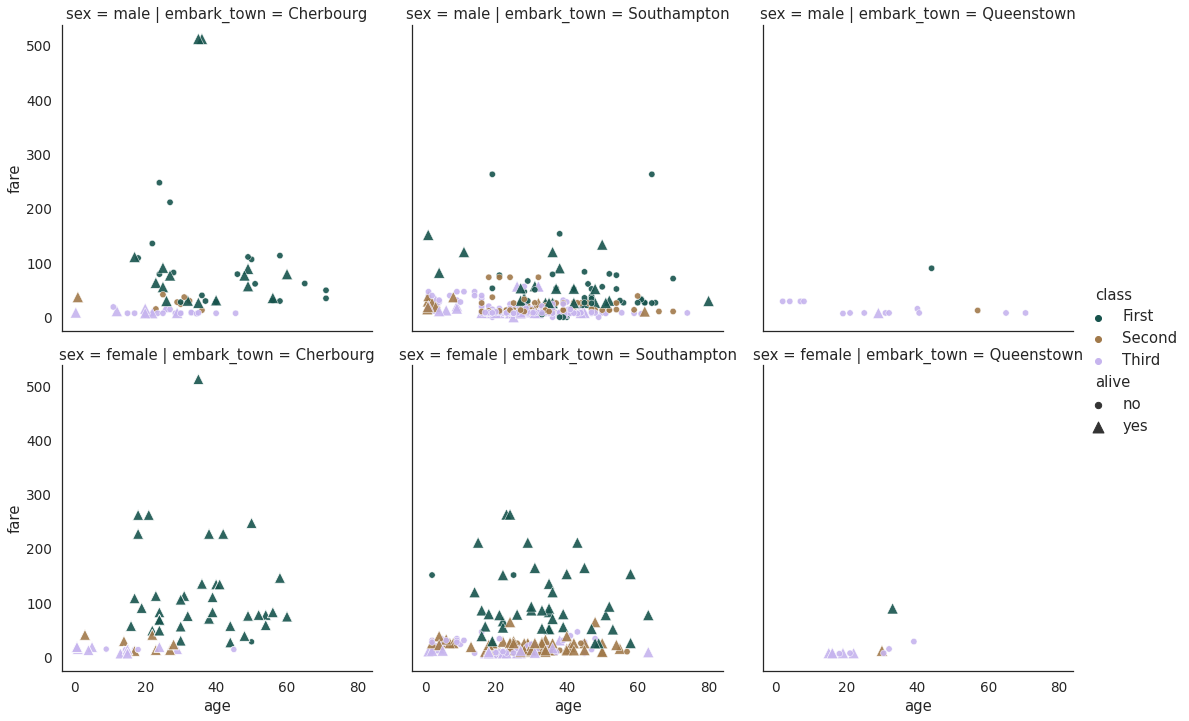

In [ ]:
sns.set_style('white')
sns.set_context('notebook', font_scale=1.24)

pattern = {"no": "o", "yes": '^'}

sns.relplot(data= titanic, x='age', y='fare',col='embark_town', size='alive', row='sex',
            sizes=(120,40), hue='class',alpha=0.9, hue_order = ['First','Second','Third'], col_order=['Cherbourg','Southampton','Queenstown'],
            palette="cubehelix", style='alive', markers=pattern)
plt.show()

In [ ]:
penguins=sns.load_dataset('penguins')
penguins[:3]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


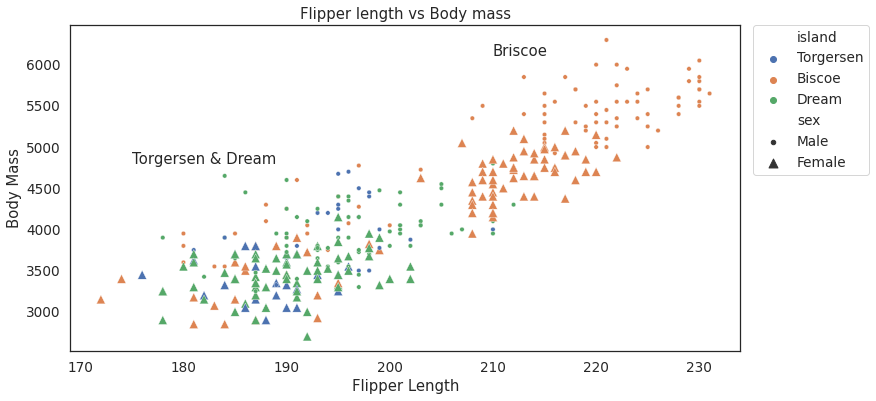

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

# creating a line plot
sns.scatterplot(data=penguins,x='flipper_length_mm',y='body_mass_g',hue='island',size='sex',sizes=(80,20),
                style='sex',markers={'Male':'o','Female':'^'})

ax.annotate(s='Briscoe',xy=(210, 6100))
ax.annotate(s='Torgersen & Dream',xy=(175, 4800))
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title("Flipper length vs Body mass")
plt.legend(bbox_to_anchor=(1.02, 1),borderaxespad=0)

plt.show()


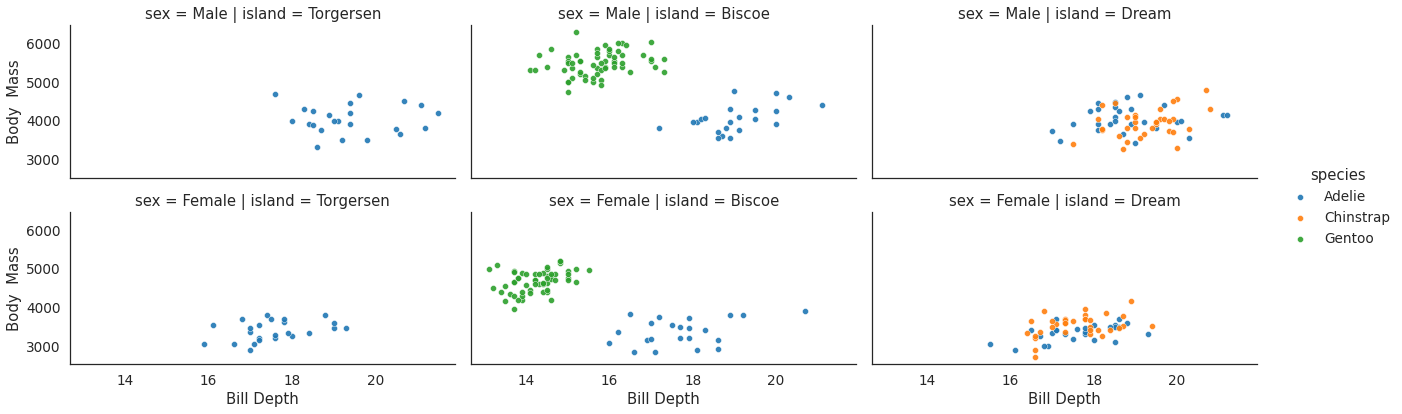

In [ ]:
sns.set_context(font_scale=1.24)
g = sns.FacetGrid(data=penguins,col='island',row='sex', height=3, aspect=2,hue='species',palette='tab10')
g.map(sns.scatterplot,'bill_depth_mm','body_mass_g',alpha = 0.9)

g.set_xlabels('Bill Depth')
g.set_ylabels('Body  Mass')

g.add_legend()
g.tight_layout()

# g.savefig("sample.jng")

plt.show()

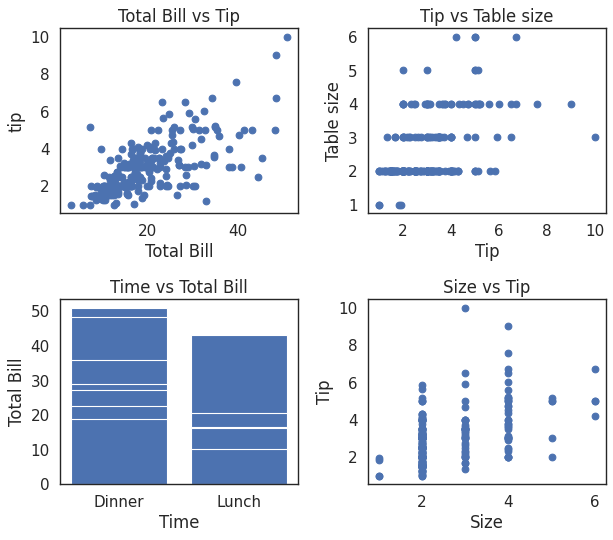

In [ ]:
# using matplotlib to plot subplots
x=tips['total_bill']
y=tips['tip']

# Reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,7), dpi = 80)
ax1.scatter(x=tips['total_bill'],y=tips['tip'])

ax1.set_xlabel('Total Bill')
ax1.set_ylabel('tip')
ax1.set_title('Total Bill vs Tip')

ax2.scatter(x=tips['tip'],y=tips['size'])
ax2.set_xlabel('Tip')
ax2.set_ylabel('Table size')
ax2.set_title('Tip vs Table size')

ax3.bar(x=tips['time'], height= tips['total_bill'])
ax3.set_xlabel('Time')
ax3.set_ylabel('Total Bill')
ax3.set_title("Time vs Total Bill")

ax4.scatter(x=tips['size'],y=tips['tip'])
ax4.set_xlabel('Size')
ax4.set_ylabel('Tip')
ax4.set_title("Size vs Tip")

# https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
fig.tight_layout()

plt.show()